# FAANG stocks in 2022

FAANG is an acronym used for 5 large US technology companies: Meta (META) (formerly known as Facebook), Amazon (AMZN), Apple (AAPL), Netflix (NFLX), and Alphabet (GOOG) (formerly known as Google). While the surge in interest in AI has shifted the spotlight to MANGO (Meta, Apple, Nvidia, Google and OpenAI), all of them are still relevant. We  will carry out an exploratory statistical analysis with Pandas tools. 

We will use the stock prices in the Nasdaq stock market, for the year 2022, as published by Yahoo Finance (for example, for APPL: `finance.yahoo.com/quote/AAPL/history?p=AAPL`). The data source is the file `FAANG_2022.csv`, which covers 251 trading days. The data come in the typical OHLC format (Open/High/Low/Close) and Volume.

## The data set

The columns of the source file are:

* `date`, the date, as 'yyyy-mm-dd'.

* `open`, the price (US dollars) of the stock at the beginning of the trading day. It can be different from the closing price of the previous trading day.

* `high`, the highest price (US dollars) of the stock on that trading day.

* `low`, the lowest price (US dollars) of the stock on that day.

* `close`, the price (US dollars) of the stock at closing time.

* `adj_close`, the closing price adjusted for factors in corporate actions, such as stock splits, dividends, and rights offerings.

* `volume`, the amount of Apple stock (number of shares) that has been traded on that day.

## Questions (Apple stock only)

Q1. Extract the data for the trading days previous to January 15th as a separate data frame.

Q2. Use a line plot to see whether there is a time trend in the opening price.

Q3. Use a line plot and a histogram to visualize the trading volume. What do you conclude?

Q4. A direct measure of volatility can be obtained as the difference of the highest price minus the lowest price in a given trading day. This is called the daily price variation Add the daily variation of the Apple stock prices as a new column. Do you see a trend in the daily price variation? How is the distribution?

Q5. Is there an association between the daily price variation and the trading volume? Is the volatility stronger the days in which more shares are traded?

## Questions (FAANG)

Q6. What is the average trading volume per ticker?

Q7. For each stock, how many days had a higher closing than opening?

Q8. Is there a correlation between the stock values of different tickers? Find the R<sup>2</sup> matrix of the opening values.

## Importing the data

We import Pandas in the usual way:

In [1]:
import pandas as pd

Let us suppose, for this example, that the source file is in our computer. To import the data with the function `read_csv()`, we have to specify where to find it. By default, it will be searched in the working directory:

In [2]:
df = pd.read_csv('FAANG_2022.csv')

This creates the data frame `df`. If the file is located somewhere else, you have to edit the path to fit the current location of the file. If you don't have file in your computer the above command yields an error. You can also load the file from github. You will need an internet connection, and it will not be as fast as having it in the local drive.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/D-G-D/Python-Bootcamp/refs/heads/main/02%20Data%20Manipulation/FAANG_2022.csv')

## Exploring the data

Since nothing has been specified about the index, a `RangeIndex` has been assigned. The report printed by the method `info()` is probably the best way to start exploring this data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     1255 non-null   object 
 1   date       1255 non-null   object 
 2   open       1255 non-null   float64
 3   high       1255 non-null   float64
 4   low        1255 non-null   float64
 5   close      1255 non-null   float64
 6   adj_close  1255 non-null   float64
 7   volume     1255 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 78.6+ KB


The dimensions and the column names are what we expected. Since there are 251 trading days for 5 tickers, there are 1255 entries in the index and the same number of non-null entries in every column. There are no missing values. The distinction between `int` and `float` columns is not relevant for a statistical description, so don't pay attention. The column `date` has been read by `.read_csv()` as type `str` (reporting it as `object` does change this fact). 

We can take a look at the first rows with the method `.head()`. We quickly see that the rows are sorted by ticker first, date second.

In [5]:
df.head()

,ticker,date,open,high,low,close,adj_close,volume
0,AAPL,2022-01-03,177.830002,182.880005,177.710007,182.009995,178.645615,104487900
1,AAPL,2022-01-04,182.630005,182.940002,179.119995,179.699997,176.378357,99310400
2,AAPL,2022-01-05,179.610001,180.169998,174.639999,174.919998,171.686722,94537600
3,AAPL,2022-01-06,172.699997,175.300003,171.639999,172.000000,168.820679,96904000
4,AAPL,2022-01-07,172.889999,174.139999,171.029999,172.169998,168.987549,86709100


A statistical summary can be extracted with the method `.describe()`. Note that the columns `date` and `ticker`, which are not numeric, are omitted.

In [6]:
df.describe()

,open,high,low,close,adj_close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,172.315998,175.406327,169.093083,172.190906,171.372671,4.780985e+07
std,79.754051,81.203363,77.667853,79.375682,79.505049,3.688998e+07
min,82.800003,83.480003,81.690002,81.820000,81.820000,3.067500e+06
25%,119.160000,121.310001,117.639999,119.790001,119.215992,2.032725e+07
50%,150.160004,152.490005,148.039993,150.619995,148.615723,3.630320e+07
75%,189.784996,193.195000,185.084999,188.690002,188.430000,7.131050e+07
max,605.609985,609.989990,590.559998,597.369995,597.369995,2.726620e+08


## Q1. Data previous to January 6th

For this type of data, we frequently filter by the date, selecting the period desired. Let us consider the expression `df['date'] < '2022-01-06'`. The Python kernel will evaluate it for every term of the column `date`, returning a Boolean mask. Using this mask as a filter, we get the requested data subset.

In [7]:
mask_aapl = df['ticker'] == 'AAPL'
mask_date = df['date'] < '2022-01-06'

In [8]:
df[mask_aapl & mask_date]

,ticker,date,open,high,low,close,adj_close,volume
0,AAPL,2022-01-03,177.830002,182.880005,177.710007,182.009995,178.645615,104487900
1,AAPL,2022-01-04,182.630005,182.940002,179.119995,179.699997,176.378357,99310400
2,AAPL,2022-01-05,179.610001,180.169998,174.639999,174.919998,171.686722,94537600


## Q2. Line plot for the opening price

Analysts typically explore trends in stock prices. Let us do that with opening price. The corresponding column is extracted as the series `df['open']`. We don't need to import and use Matplotlib ourselves, as Pandas takes care of that with the DataFrame methods. 

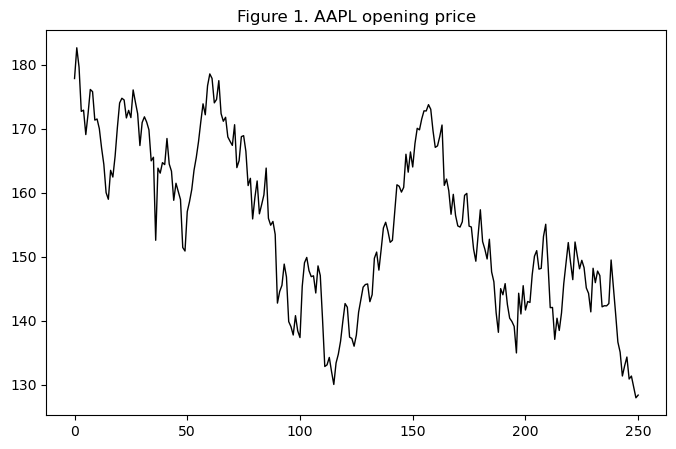

In [9]:
df['open'][mask_aapl].plot(figsize=(8,5), title='Figure 1. AAPL opening price', color='black', linewidth=1);

In this case, the line plot does not show an obvious upwards trend, but a sequence of short trends, up and down.

## Q3. Line plot and histogram for the trading volume

The numbers for the trading volume are high, since it comes as a number of shares. In such cases, rescaling can improve the picture. Here, we express the volume in millions of shares:

In [10]:
df['volume'] = df['volume']/10**6

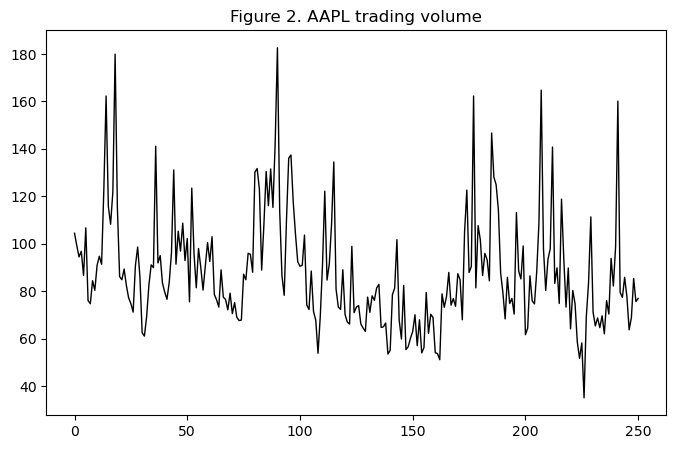

In [11]:
df['volume'][mask_aapl].plot(figsize=(8,5), title='Figure 2. AAPL trading volume', color='black', linewidth=1);

No clear trends here. The trading volume looks quite **stationary**. It may make sense to look at the distribution of the daily volumes, as if they were extracted from a "population". The histogram is a quick and dirty graphical tool for this job. In Pandas, the method `.plot.hist()` returns a histogram. The argument `edgecolor='white'` improves the picture (you may disagree), delineating the border of the histogram bars.

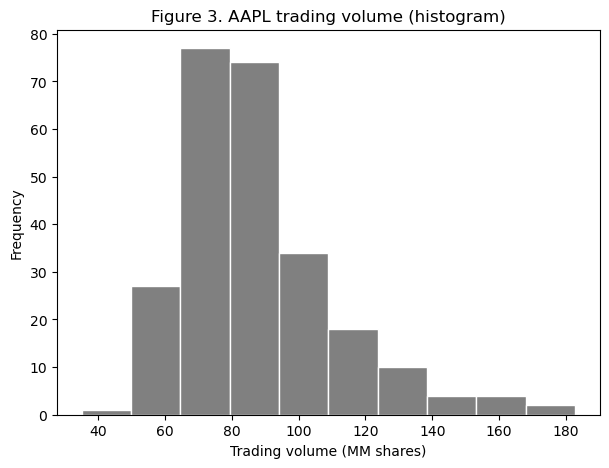

In [12]:
df['volume'][mask_aapl].plot.hist(figsize=(7,5),
                                  title='Figure 3. AAPL trading volume (histogram)',
                                  color='gray', edgecolor='white', xlabel='Trading volume (MM shares)');

We don't see here the bell-shaped profile of the statisticians' beloved model, the **normal distribution**, but that of a **skewed distribution**. This type of distribution, with a well-defined **right tail**, is typical of variables whose values are amounts of money.

## Q4. Trend and distribution for the daily price variation

We could calculate the daily price variation and keep it as a separate series, or add it as a new column to the current data frame `df`. We choose here the second option.

In [13]:
df['dvar'] = df['high'] - df['low']

When displaying the heading rows of the new data frame, we see the new column on the right side.

In [14]:
df.head()

,ticker,date,open,high,low,close,adj_close,volume,dvar
0,AAPL,2022-01-03,177.830002,182.880005,177.710007,182.009995,178.645615,104.4879,5.169998
1,AAPL,2022-01-04,182.630005,182.940002,179.119995,179.699997,176.378357,99.3104,3.820007
2,AAPL,2022-01-05,179.610001,180.169998,174.639999,174.919998,171.686722,94.5376,5.529999
3,AAPL,2022-01-06,172.699997,175.300003,171.639999,172.000000,168.820679,96.9040,3.660004
4,AAPL,2022-01-07,172.889999,174.139999,171.029999,172.169998,168.987549,86.7091,3.110001


Now, the line plot and the histogram are obtained as for the trading volume. They are similar.

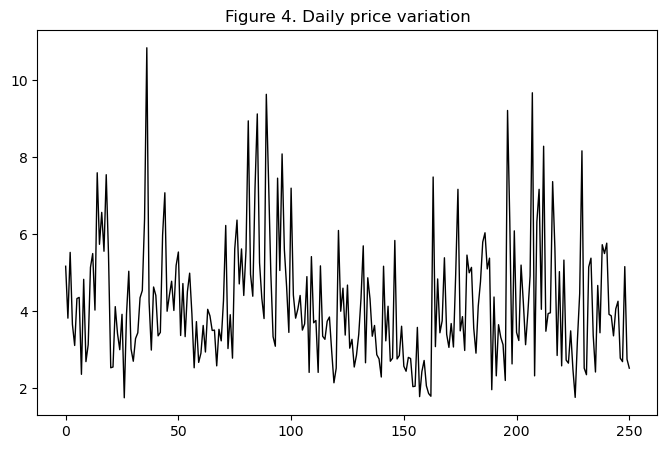

In [15]:
df['dvar'][mask_aapl].plot(figsize=(8,5), title='Figure 4. Daily price variation',
                           color='black', linewidth=1);

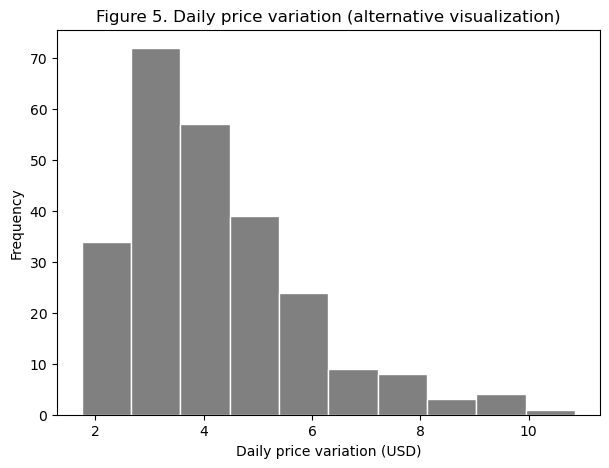

In [16]:
df['dvar'][mask_aapl].plot.hist(figsize=(7,5),
                                title='Figure 5. Daily price variation (alternative visualization)',
                                color='gray', edgecolor='white', xlabel='Daily price variation (USD)');

## Q5. Association between daily price variation and trading volume

Common wisdom tells us that price will show more intraday variation the days in which there is more trading activity, and less intraday variation with low activity. Comparing line plots may gives us an idea of this type of association, but is better to put together the two series in a **scatter plot**. We can get a scatter plot in Pandas with the method `.plot.scatter()`.

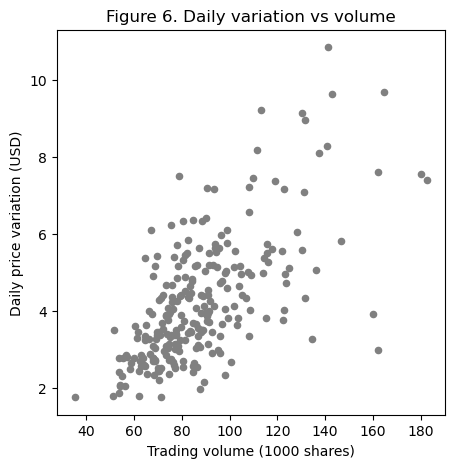

In [17]:
df[mask_aapl].plot.scatter(x='volume', y='dvar', title='Figure 6. Daily variation vs volume',
                           figsize=(5,5), color='gray',
                           xlabel='Trading volume (1000 shares)', ylabel='Daily price variation (USD)');

The scatter plot somewhat confirms our guess of a positive association between the trading volume and the daily variation, though the interpretation of plots is always subjective. To be objective, statisticians use the correlation to evaluate the strength of the association. More specifically, it tells us the extent to which one series can be represented as a linear expression of the other series. The correlation can be positive or negative. A strong correlation is one which is close to 1 (or -1), and a weak correlation one which is close to 0. In Pandas, correlations can be calculated with the method `.corr()`.

In [18]:
df['volume'][mask_aapl].corr(df['dvar'])

0.6461533889925509

This correlation is relevant, and confirms our guess. You may wonder why do you need so many decimals for a correlation. Indeed, correlations are better expressed with two (maybe three) decimals. You can get this with method `.round()`.

In [19]:
df['volume'][mask_aapl].corr(df['dvar']).round(2)

0.65

## Question 6: Average trading volume per ticker

We have two ways of calculating the average traded volume per ticker. The result is the same, except the output column has a different name:

In [20]:
pd.pivot_table(df, values='volume', index='ticker', aggfunc='mean').round(2)

,volume
ticker,
AAPL,87.91
AMZN,76.08
GOOG,28.62
META,35.56
NFLX,10.88


In [21]:
df.groupby(by='ticker')['volume'].agg(['mean']).round(2)

,mean
ticker,
AAPL,87.91
AMZN,76.08
GOOG,28.62
META,35.56
NFLX,10.88


## Question 7: Number of days with positive closing
We can create a new column to indicate whether the day had a higher closing than opening:

In [22]:
df['higher_close'] = df['close'] > df['open']

In [23]:
pd.pivot_table(df, values='higher_close', index='ticker', aggfunc='sum').sort_values('higher_close', ascending=False)

,higher_close
ticker,
META,129
AAPL,127
GOOG,123
NFLX,117
AMZN,115


An alternative way, since we are counting numbers is to use `.value_counts()`:

In [24]:
df[['ticker', 'higher_close']].value_counts().sort_index()

ticker  higher_close
AAPL    False           124
        True            127
AMZN    False           136
        True            115
GOOG    False           128
        True            123
META    False           122
        True            129
NFLX    False           134
        True            117
Name: count, dtype: int64

## Question 8: Ticker correlation
First, we need to pivot the table. We want to have one row per date ("index"), one column per ticker ("column") and the table values must be the percentage change of the 'open' value with respect to the previous row.

In [25]:
df_open = df.pivot(index='date', columns='ticker', values='open')
df_open.head(3)

ticker,AAPL,AMZN,GOOG,META,NFLX
date,,,,,
2022-01-03,177.830002,167.550003,144.475494,338.299988,605.609985
2022-01-04,182.630005,170.438004,145.550507,339.950012,599.909973
2022-01-05,179.610001,166.882996,144.181000,333.019989,592.000000


Since the values have different scales (Netflix shares are roughly 4x Google's), we want to look at percentage changes. The method `.pct_change()` calculates this as `(c-p)/p` with `c` being current value and `p` previous row value:

In [26]:
df_open = df_open.pct_change()
df_open.head(3)

ticker,AAPL,AMZN,GOOG,META,NFLX
date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.026992,0.017237,0.007441,0.004877,-0.009412
2022-01-05,-0.016536,-0.020858,-0.009409,-0.020385,-0.013185


The first row has no value. This is expected, as we have no previous value to calculate the change. Now we can calculate the correlation, and from it, the R<sup>2</sup> matrix.

In [27]:
(df_open.corr().pow(2)*100).round(1)

ticker,AAPL,AMZN,GOOG,META,NFLX
ticker,,,,,
AAPL,100.0,49.4,58.3,28.2,27.2
AMZN,49.4,100.0,56.6,28.9,25.4
GOOG,58.3,56.6,100.0,44.0,27.4
META,28.2,28.9,44.0,100.0,19.2
NFLX,27.2,25.4,27.4,19.2,100.0
